In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
import tensorflow as tf
#installed necessary libraries and imported them

In [ ]:
df = pd.read_csv(r'NSE-TATAGLOBAL.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,27-07-2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,26-07-2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,23-07-2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,22-07-2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,21-07-2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


C:\Users\aman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


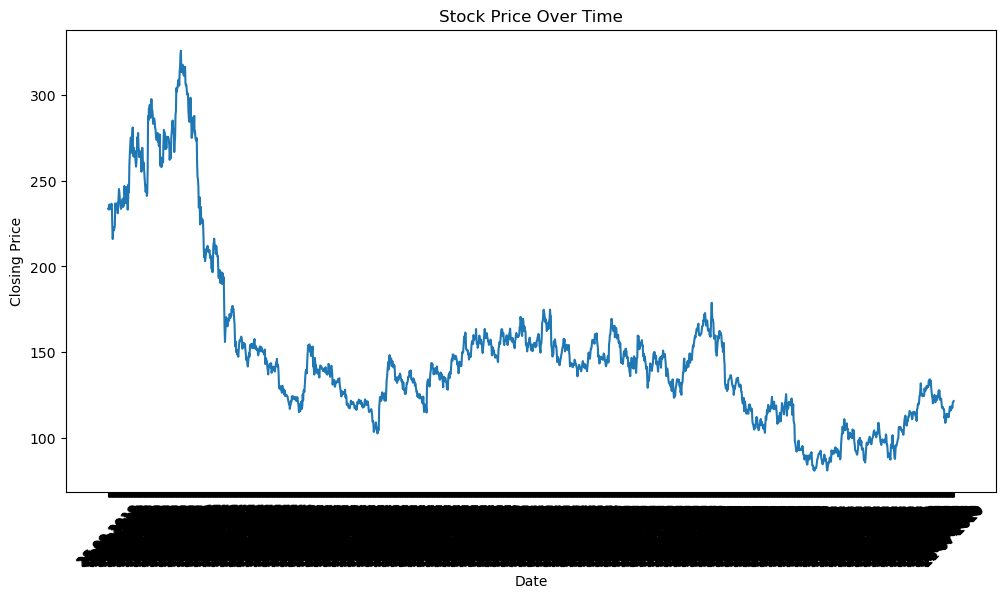

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)   #to avoid overlapping and improve readability if the date labels are long.
plt.show()

C:\Users\aman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\aman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


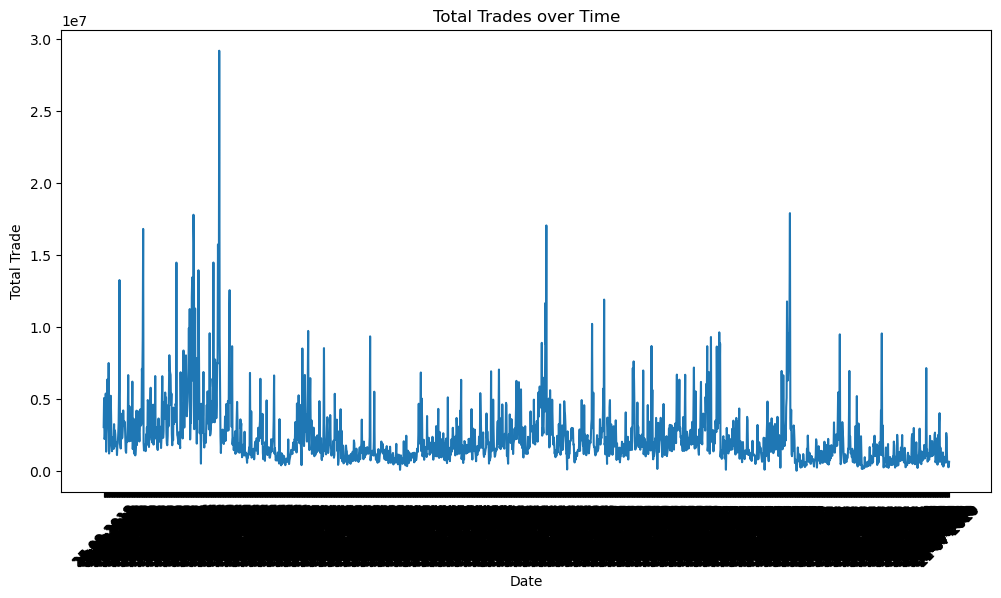

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Total Trade Quantity')
plt.title('Total Trades over Time')
plt.xlabel('Date')
plt.ylabel('Total Trade')
plt.xticks(rotation=45)
plt.show()

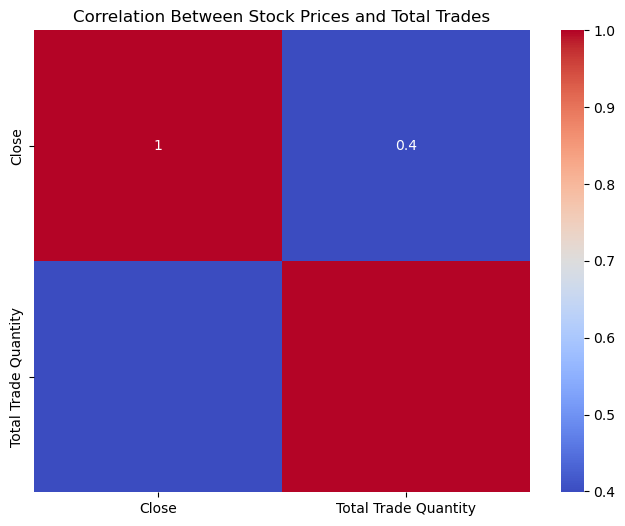

In [ ]:
# Assuming 'Close' and 'Total Trades' are columns in the DataFrame df
correlation_matrix = df[['Close', 'Total Trade Quantity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices and Total Trades')
plt.show()

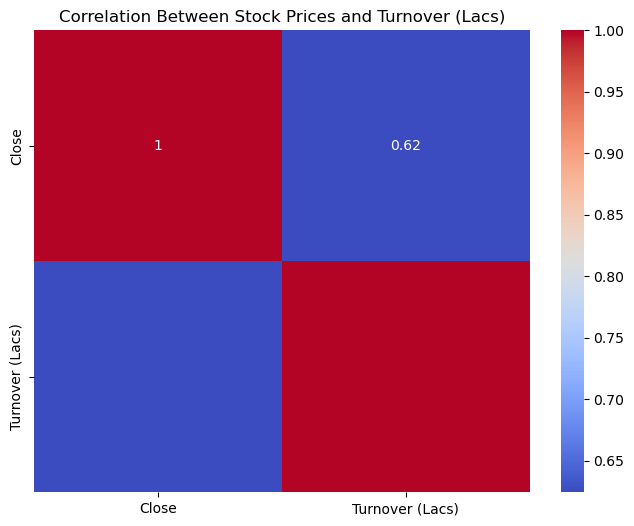

In [ ]:
correlation_matrix = df[['Close', 'Turnover (Lacs)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices and Turnover (Lacs)')
plt.show()

In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1


array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1322, 713)

In [ ]:
#Data preprocessing
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 75
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)
#(Number of records,time_step)

(1246, 75)
(1246,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(637, 75)
(637,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(75, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')


model.summary()

C:\Users\aman\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 75, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 75, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - loss: 0.0601 - val_loss: 0.0043
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0015 - val_loss: 9.4776e-04
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0016 - val_loss: 9.3725e-04
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0013 - val_loss: 9.9974e-04
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0013 - val_loss: 8.1209e-04
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0014 - val_loss: 8.5797e-04
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.023773384901985266

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.02054821399529549

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

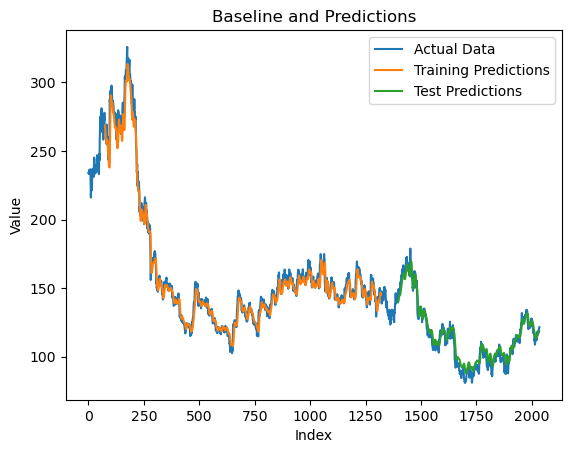

In [ ]:

look_back=75
# Create arrays to plot baseline, training predictions, and test predictions
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot the baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Actual Data')  # Plot the actual data
plt.plot(trainPredictPlot, label='Training Predictions')     # Plot the training predictions
plt.plot(testPredictPlot, label='Test Predictions')          # Plot the test predictions

# Label the plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Baseline and Predictions')
plt.legend()  # Show legend with the labels specified above
plt.show()

In [ ]:
len(test_data)

713

In [ ]:
x_input=test_data[345:].reshape(1,-1)#Predicting with the help of previous 100 days
x_input.shape

(1, 368)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
len(temp_input)

368

In [ ]:
from numpy import array

lst_output = []
n_steps = 368
i = 0
while i < 10:

    if len(temp_input) > 368:
        # print(temp_input)
        x_input = np.array(temp_input[1:])  # Exclude the first element
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))  # Reshape to match the model input shape
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)


0 day input [0.02696078 0.03574346 0.03594771 0.04044118 0.03921569 0.04411765
 0.02982026 0.0122549  0.01286765 0.01143791 0.00245098 0.0059232
 0.         0.00714869 0.00428922 0.0067402  0.0063317  0.01123366
 0.01960784 0.02757353 0.03002451 0.03349673 0.04003268 0.04084967
 0.03982843 0.04166667 0.04370915 0.04758987 0.03594771 0.02839052
 0.02410131 0.01715686 0.01531863 0.01756536 0.02696078 0.02696078
 0.03819444 0.02839052 0.02369281 0.02920752 0.02328431 0.01919935
 0.00653595 0.00061275 0.00796569 0.01245915 0.01981209 0.01940359
 0.02246732 0.03125    0.02348856 0.0249183  0.02144608 0.04840686
 0.04575163 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667
 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049
 0.04799837 0.05147059 0.05065359 0.03431373 0.04575163 0.04187092
 0.04554739 0.03941993 0.02716503 0.03125    0.05882353 0.07148693
 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392 0.10375817
 0.12275327 0.10906863 0.09660948 0.1064134  0.10457

In [ ]:
day_new=np.arange(1,151)
day_pred=np.arange(151,161)
import matplotlib.pyplot as plt
len(df1)

2035

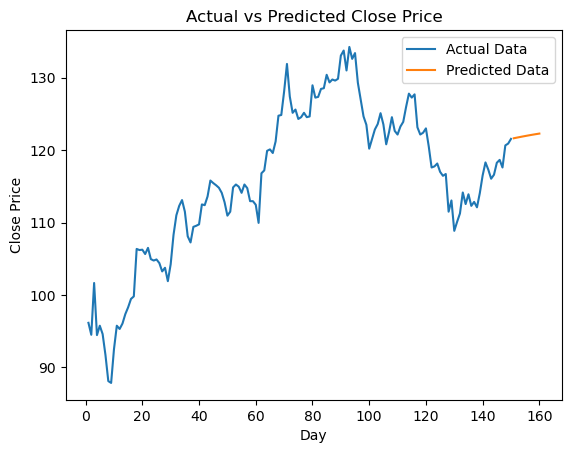

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual data
plt.plot(day_new, scaler.inverse_transform(df1[1885:]), label='Actual Data')

# Plotting the predicted data
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predicted Data')

plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()


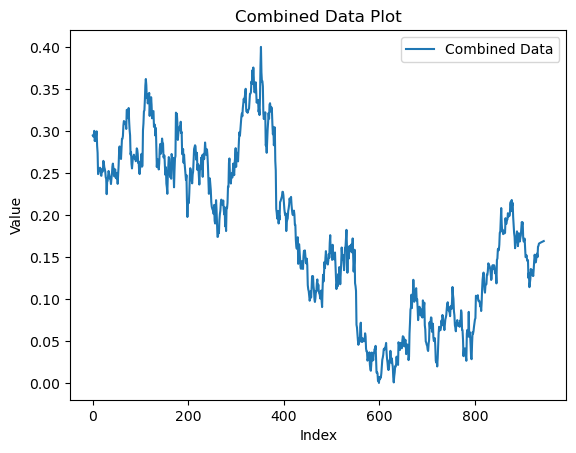

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
# Plot the combined data
plt.plot(df3[1100:], label='Combined Data')
# Label the plot
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Combined Data Plot')
plt.legend()
plt.show()
